<a href="https://colab.research.google.com/github/lijandy92/computacion/blob/main/Ultima_version_Ultima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primero debemos cargar las imágenes y llevarlas a la misma transformación geométrica y sistema de coordenaas de referencia.
Para ello se requiere la biblioteca gdal.

In [45]:
pip install gdal

Tenemos tres imagenes por lo tanto vamos a trabajar con tres dataset.

In [46]:
from google.colab import files
import io
import tifffile
import numpy as np

# Cargar las imágenes de las bandas de Landsat
uploaded_files = files.upload()

# Leer los archivos cargados y almacenar las bandas de Landsat en un arreglo numpy
bandas_landsat = []
for filename, filedata in uploaded_files.items():
    # Leer el archivo TIFF utilizando io.BytesIO y tifffile
    bytes_io = io.BytesIO(filedata)
    banda = tifffile.imread(bytes_io)
    bandas_landsat.append(banda)

# Convierte la lista de bandas en un arreglo numpy
bandas_landsat = np.stack(bandas_landsat, axis=-1)

# Verifica las dimensiones del arreglo de bandas de Landsat
print(bandas_landsat.shape)  # Salida: (altura, anchura, num_bandas)


Saving 20210109_B1.tif to 20210109_B1 (3).tif
Saving 20210109_B2.tif to 20210109_B2 (3).tif
Saving 20210109_B3.tif to 20210109_B3 (3).tif
Saving 20210109_B4.tif to 20210109_B4 (3).tif
Saving 20210109_B5.tif to 20210109_B5 (3).tif
Saving 20210109_B6.tif to 20210109_B6 (3).tif
Saving 20210109_B7.tif to 20210109_B7 (3).tif
Saving 20210109_B10.tif to 20210109_B10 (3).tif
(1494, 799, 8)


Banda 1: Valor máximo = 20035, Valor mínimo = 0
Banda 2: Valor máximo = 21029, Valor mínimo = 0
Banda 3: Valor máximo = 24246, Valor mínimo = 5549
Banda 4: Valor máximo = 24588, Valor mínimo = 6631
Banda 5: Valor máximo = 30761, Valor mínimo = 8180
Banda 6: Valor máximo = 37757, Valor mínimo = 7363
Banda 7: Valor máximo = 36003, Valor mínimo = 7401
Banda 8: Valor máximo = 48269, Valor mínimo = 43646


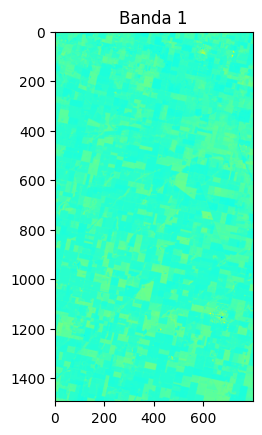

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener el valor máximo y mínimo de cada banda Landsat
maximos = np.max(bandas_landsat, axis=(0, 1))
minimos = np.min(bandas_landsat, axis=(0, 1))

# Mostrar los valores máximo y mínimo de cada banda
for i, (maximo, minimo) in enumerate(zip(maximos, minimos)):
    print(f"Banda {i+1}: Valor máximo = {maximo}, Valor mínimo = {minimo}")

# Visualizar la primera imagen
plt.imshow(bandas_landsat[..., 0], cmap='jet')
plt.title('Banda 1')
plt.show()


In [48]:
import numpy as np

# bandas_landsat contiene las imágenes de las bandas de Landsat en un arreglo numpy

# Verificar si hay valores NaN en las imágenes de las bandas de Landsat
hay_nan = np.isnan(bandas_landsat)

# Contar la cantidad de valores NaN en cada banda
cantidad_nan_por_banda = np.sum(hay_nan, axis=(0, 1))

# Verificar si hay valores NaN en alguna banda
hay_nan_en_alguna_banda = np.any(cantidad_nan_por_banda > 0)

# Imprimir los resultados
print("¿Hay valores NaN en alguna banda?:", hay_nan_en_alguna_banda)
print("Cantidad de NaN por banda:", cantidad_nan_por_banda)

¿Hay valores NaN en alguna banda?: False
Cantidad de NaN por banda: [0 0 0 0 0 0 0 0]


**Vamos** a cargar el mapa de humedad corespondiente

In [49]:
from google.colab import files
import io
import tifffile
import numpy as np

# Cargar los mapas de humedad
uploaded_files = files.upload()

mapas_humedad = []

for filename, filedata in uploaded_files.items():
    # Leer el archivo del mapa de humedad utilizando io.BytesIO y tifffile
    bytes_io = io.BytesIO(filedata)
    mapa_humedad = tifffile.imread(bytes_io)
    mapas_humedad.append(mapa_humedad)

# Convertir la lista de mapas de humedad en un arreglo numpy
mapas_humedad = np.stack(mapas_humedad, axis=-1)

# Verificar las dimensiones del arreglo de mapas de humedad
print(mapas_humedad.shape)  # Salida: (altura, anchura, num_mapas)


Saving HS_20210109.tif to HS_20210109 (1).tif
(1497, 796, 1)


Valor mínimo: -9999.0
Valor máximo: 0.18999983


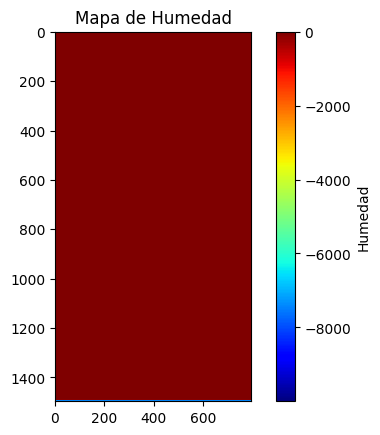

In [50]:
import matplotlib.pyplot as plt
valor_minimo = np.min(mapa_humedad)
valor_maximo = np.max(mapa_humedad)

print("Valor mínimo:", valor_minimo)
print("Valor máximo:", valor_maximo)
# Visualizar la imagen del mapa de humedad
plt.imshow(mapa_humedad, cmap='jet')
plt.title('Mapa de Humedad')
plt.colorbar(label='Humedad')
plt.show()

In [51]:
# Reemplazar los valores nan por 0
mapa_humedad_resized = np.nan_to_num(mapa_humedad, nan=0)
mapa_humedad_resized[mapa_humedad_resized < 0] = 0

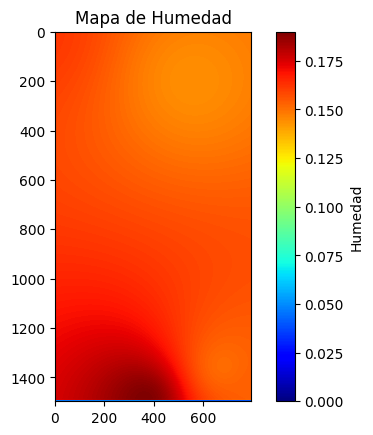

In [52]:
# Visualizar el mapa de humedad
plt.imshow(mapa_humedad_resized, cmap='jet')
plt.title('Mapa de Humedad')
plt.colorbar(label='Humedad')
plt.show()
mapa_humedad=mapa_humedad_resized

In [53]:
from skimage.transform import resize

# Redimensionar el mapa de humedad utilizando la función resize de scikit-image
mapa_humedad_resized = resize(mapa_humedad, (1494, 799))

# Verificar las dimensiones del mapa de humedad redimensionado
print(mapa_humedad_resized.shape)

(1494, 799)


Valor mínimo: 0.0
Valor máximo: 0.18999965


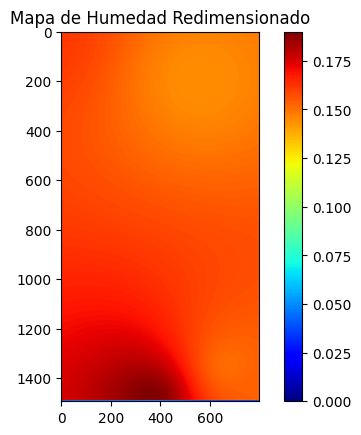

In [54]:
import matplotlib.pyplot as plt
valor_minimo = np.min(mapa_humedad_resized)
valor_maximo = np.max(mapa_humedad_resized)

print("Valor mínimo:", valor_minimo)
print("Valor máximo:", valor_maximo)
# Graficar la imagen resultante
plt.imshow(mapa_humedad_resized, cmap='jet')
plt.colorbar()
plt.title('Mapa de Humedad Redimensionado')
plt.show()


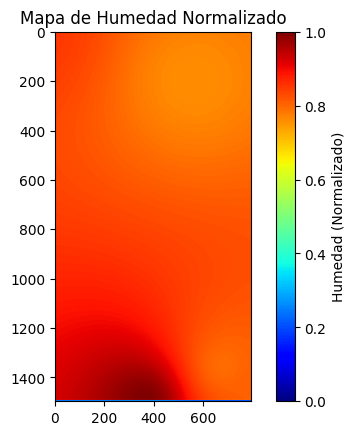

In [55]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Supongamos que 'mapa_humedad' es tu matriz de humedad

# Crear una instancia del objeto MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape de la matriz para que tenga una dimensión adecuada para el escalado
mapa_humedad_reshaped = np.reshape(mapa_humedad, (-1, 1))

# Normalizar los valores de la matriz en una escala de 0 a 1
mapa_humedad_normalizado = scaler.fit_transform(mapa_humedad_reshaped)

# Reshape nuevamente a la forma original
mapa_humedad_normalizado = np.reshape(mapa_humedad_normalizado, mapa_humedad.shape)

# Visualizar el mapa de humedad normalizado
plt.imshow(mapa_humedad_normalizado, cmap='jet')
plt.title('Mapa de Humedad Normalizado')
plt.colorbar(label='Humedad (Normalizado)')
plt.show()

mapa_humedad=mapa_humedad_normalizado

In [56]:
import numpy as np

# Dimensiones de la imagen de Landsat y el mapa de humedad
landsat_shape = (1494, 799)  # Dimensiones de la imagen de Landsat
humedad_shape = (1494, 799)  # Dimensiones del mapa de humedad

# Calcular las coordenadas aproximadas
landsat_height = landsat_shape[0]
landsat_width = landsat_shape[1]

# Coordenadas para entrenamiento (60% inferior)
train_coords = [(int(landsat_height * 0.4), 0), (landsat_height, landsat_width)]

# Coordenadas para validación (20% superior derecho)
val_coords = [(0, int(landsat_width * 0.8)), (int(landsat_height * 0.4), landsat_width)]

# Coordenadas para prueba (20% superior izquierdo)
test_coords = [(0, 0), (int(landsat_height * 0.4), int(landsat_width * 0.8))]

# Imprimir las coordenadas rectificadas
print("Train coordinates: ", train_coords)
print("Validation coordinates: ", val_coords)
print("Test coordinates: ", test_coords)



Train coordinates:  [(597, 0), (1494, 799)]
Validation coordinates:  [(0, 639), (597, 799)]
Test coordinates:  [(0, 0), (597, 639)]


In [57]:
print(bandas_landsat.shape)

(1494, 799, 8)


In [58]:
# Dividir las imágenes de Landsat en conjuntos de entrenamiento, validación y prueba
train_landsat = bandas_landsat[train_coords[0][0]:train_coords[1][0], train_coords[0][1]:train_coords[1][1], :]
val_landsat = bandas_landsat[val_coords[0][0]:val_coords[1][0], val_coords[0][1]:val_coords[1][1], :]
test_landsat = bandas_landsat[test_coords[0][0]:test_coords[1][0], test_coords[0][1]:test_coords[1][1], :]

# Dividir el mapa de humedad en conjuntos de entrenamiento, validación y prueba
train_humedad = mapa_humedad_resized[train_coords[0][0]:train_coords[1][0], train_coords[0][1]:train_coords[1][1]]
val_humedad = mapa_humedad_resized[val_coords[0][0]:val_coords[1][0], val_coords[0][1]:val_coords[1][1]]
test_humedad = mapa_humedad_resized[test_coords[0][0]:test_coords[1][0], test_coords[0][1]:test_coords[1][1]]

# Verificar las dimensiones de los conjuntos divididos
print("Dimensiones del conjunto de entrenamiento de Landsat:", train_landsat.shape)
print("Dimensiones del conjunto de validación de Landsat:", val_landsat.shape)
print("Dimensiones del conjunto de prueba de Landsat:", test_landsat.shape)
print("Dimensiones del conjunto de entrenamiento de humedad:", train_humedad.shape)
print("Dimensiones del conjunto de validación de humedad:", val_humedad.shape)
print("Dimensiones del conjunto de prueba de humedad:", test_humedad.shape)


Dimensiones del conjunto de entrenamiento de Landsat: (897, 799, 8)
Dimensiones del conjunto de validación de Landsat: (597, 160, 8)
Dimensiones del conjunto de prueba de Landsat: (597, 639, 8)
Dimensiones del conjunto de entrenamiento de humedad: (897, 799)
Dimensiones del conjunto de validación de humedad: (597, 160)
Dimensiones del conjunto de prueba de humedad: (597, 639)


In [59]:
!pip install torch

In [60]:
import torch
if torch.cuda.is_available():
    device = torch.cuda.get_device_name(0)
    print("GPU:", device)
else:
    print("No GPU available")

GPU: Tesla T4


In [61]:
import numpy as np
from skimage.util import view_as_windows

# Tamaño de los parches
patch_size = (64, 64, bandas_landsat.shape[2])  # Tamaño del parche considerando los canales de Landsat

# Dividir el conjunto de entrenamiento en parches
train_patches = view_as_windows(train_landsat, patch_size, step=patch_size)
train_patches = train_patches.reshape(-1, *patch_size)

# Dividir el conjunto de validación en parches
val_patches = view_as_windows(val_landsat, patch_size, step=patch_size)
val_patches = val_patches.reshape(-1, *patch_size)

# Dividir el conjunto de prueba en parches
test_patches = view_as_windows(test_landsat, patch_size, step=patch_size)
test_patches = test_patches.reshape(-1, *patch_size)

# Dividir el mapa de humedad en parches correspondientes
train_humidity_patches = view_as_windows(train_humedad, (patch_size[0], patch_size[1]), step=patch_size[0])
train_humidity_patches = train_humidity_patches.reshape(-1, patch_size[0], patch_size[1])

val_humidity_patches = view_as_windows(val_humedad, (patch_size[0], patch_size[1]), step=patch_size[0])
val_humidity_patches = val_humidity_patches.reshape(-1, patch_size[0], patch_size[1])

test_humidity_patches = view_as_windows(test_humedad, (patch_size[0], patch_size[1]), step=patch_size[0])
test_humidity_patches = test_humidity_patches.reshape(-1, patch_size[0], patch_size[1])

# Verificar las dimensiones de los conjuntos de parches
print("Dimensiones del conjunto de parches de entrenamiento de Landsat:", train_patches.shape)
print("Dimensiones del conjunto de parches de validación de Landsat:", val_patches.shape)
print("Dimensiones del conjunto de parches de prueba de Landsat:", test_patches.shape)
print("Dimensiones del conjunto de parches de entrenamiento de humedad:", train_humidity_patches.shape)
print("Dimensiones del conjunto de parches de validación de humedad:", val_humidity_patches.shape)
print("Dimensiones del conjunto de parches de prueba de humedad:", test_humidity_patches.shape)




Dimensiones del conjunto de parches de entrenamiento de Landsat: (168, 64, 64, 8)
Dimensiones del conjunto de parches de validación de Landsat: (18, 64, 64, 8)
Dimensiones del conjunto de parches de prueba de Landsat: (81, 64, 64, 8)
Dimensiones del conjunto de parches de entrenamiento de humedad: (168, 64, 64)
Dimensiones del conjunto de parches de validación de humedad: (18, 64, 64)
Dimensiones del conjunto de parches de prueba de humedad: (81, 64, 64)


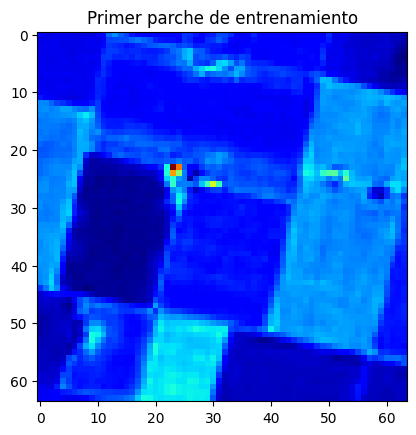

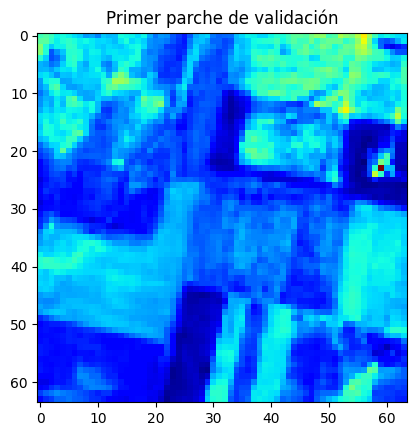

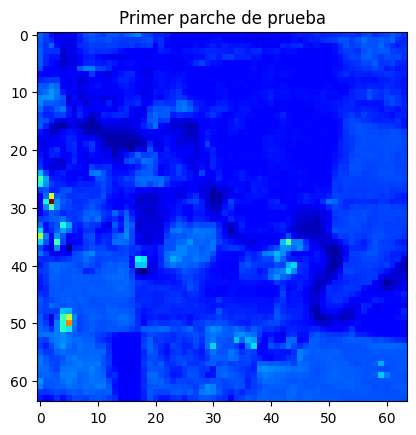

In [62]:
import matplotlib.pyplot as plt

# Seleccionar un canal específico para visualizar
canal = 0  # Puedes cambiar este valor para seleccionar un canal diferente

# Visualizar el primer parche de entrenamiento
plt.imshow(train_patches[0, :, :, canal], cmap='jet')
plt.title('Primer parche de entrenamiento')
plt.show()

# Visualizar el primer parche de validación
plt.imshow(val_patches[0, :, :, canal], cmap='jet')
plt.title('Primer parche de validación')
plt.show()

# Visualizar el primer parche de prueba
plt.imshow(test_patches[0, :, :, canal], cmap='jet')
plt.title('Primer parche de prueba')
plt.show()



In [63]:
import numpy as np
from skimage import transform

def agregar_ruido(parche, media=0, desviacion=0.05):
    # Generar ruido gaussiano con la misma forma que el parche
    ruido = np.random.normal(loc=media, scale=desviacion, size=parche.shape)

    # Sumar el ruido al parche
    parche_ruidoso = parche + ruido

    # Asegurarse de que los valores estén en el rango [0, 1]
    parche_ruidoso = np.clip(parche_ruidoso, 0, 1)

    return parche_ruidoso


def aplicar_transformaciones_aleatorias(parche):
    # Aplicar transformaciones aleatorias al parche de entrada
    random_flip = np.random.choice([False, False])
    random_rotation = np.random.uniform(-15,15)
    random_scale = np.random.uniform(0.8, 1.2)

    parche_transformado = parche.copy()

    if random_flip:
        parche_transformado = np.fliplr(parche_transformado)

    parche_transformado = transform.rotate(parche_transformado, random_rotation)
    parche_transformado = transform.rescale(parche_transformado, random_scale, multichannel=True, anti_aliasing=True)

    return parche_transformado

def aplicar_aumento_datos(parches_landsat, parches_humedad, factor_aumento=2):
    parches_landsat_aumentados = []
    parches_humedad_aumentados = []

    for i in range(len(parches_landsat)):
        parche_landsat = parches_landsat[i]
        parche_humedad = parches_humedad[i]

        parches_landsat_aumentados.append(parche_landsat)
        parches_humedad_aumentados.append(parche_humedad)

        for _ in range(factor_aumento):
            # Aplicar transformaciones aleatorias a los parches de Landsat y humedad
            parche_landsat_transformado = aplicar_transformaciones_aleatorias(parche_landsat)
            parche_humedad_transformado = aplicar_transformaciones_aleatorias(parche_humedad)

            # Agregar ruido a los parches transformados
            parche_landsat_ruidoso = agregar_ruido(parche_landsat_transformado)
            parche_humedad_ruidoso = agregar_ruido(parche_humedad_transformado)

            parches_landsat_aumentados.append(parche_landsat_transformado)
            parches_landsat_aumentados.append(parche_landsat_ruidoso)

            parches_humedad_aumentados.append(parche_humedad_transformado)
            parches_humedad_aumentados.append(parche_humedad_ruidoso)

    return np.array(parches_landsat_aumentados), np.array(parches_humedad_aumentados)

# Aplicar aumento de datos a los conjuntos de parches de Landsat y humedad
train_patches_landsat_aumentados, train_patches_humedad_aumentados = aplicar_aumento_datos(train_patches, train_humidity_patches)
val_patches_landsat_aumentados, val_patches_humedad_aumentados = aplicar_aumento_datos(val_patches, val_humidity_patches)
test_patches_landsat_aumentados, test_patches_humedad_aumentados = aplicar_aumento_datos(test_patches, test_humidity_patches)

<ipython-input-63-420d4339c3b3>:29: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  parche_transformado = transform.rescale(parche_transformado, random_scale, multichannel=True, anti_aliasing=True)
<ipython-input-63-420d4339c3b3>:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(parches_landsat_aumentados), np.array(parches_humedad_aumentados)


In [64]:
import torch
from torch.utils.data import Dataset

class PatchDataset(torch.utils.data.Dataset):
    def __init__(self, patches, humidity_patches):
        self.patches = patches
        self.humidity_patches = humidity_patches

    def __len__(self):
        return len(self.patches)

    def __getitem__(self, idx):
        patch = self.patches[idx]
        humidity_patch = self.humidity_patches[idx]
        return patch, humidity_patch


def create_dataset(train_patches, val_patches, test_patches, train_humidity_patches, val_humidity_patches, test_humidity_patches):
    train_dataset = PatchDataset(train_patches, train_humidity_patches)
    val_dataset = PatchDataset(val_patches, val_humidity_patches)
    test_dataset = PatchDataset(test_patches, test_humidity_patches)
    return train_dataset, val_dataset, test_dataset



In [65]:
import torch
import torch.nn as nn

# Definir la clase DoubleConv con capa de normalización y función de activación ReLU
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.conv(x)

# Definir la arquitectura de U-Net mejorada
class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        self.encoder1 = DoubleConv(in_channels, 64)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.encoder2 = DoubleConv(64, 128)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.encoder3 = DoubleConv(128, 256)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.encoder4 = DoubleConv(256, 512)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.bottleneck = DoubleConv(512, 1024)

        self.upconv1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.decoder1 = DoubleConv(1024, 512)
        self.upconv2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.decoder2 = DoubleConv(512, 256)
        self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.decoder3 = DoubleConv(256, 128)
        self.upconv4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.decoder4 = DoubleConv(128, 64)

        self.conv_out = nn.Conv2d(64, out_channels, kernel_size=1)
        self.sigmoid = nn.Sigmoid()
        self.norm = nn.BatchNorm2d(out_channels)

        self.dropout = nn.Dropout2d(p=0.2)  # Regularización de abandono (dropout)
        self.l2_regularization = nn.MSELoss()

    def forward(self, x):
        enc1 = self.encoder1(x)
        pool1 = self.pool1(enc1)
        enc2 = self.encoder2(pool1)
        pool2 = self.pool2(enc2)
        enc3 = self.encoder3(pool2)
        pool3 = self.pool3(enc3)
        enc4 = self.encoder4(pool3)
        pool4 = self.pool4(enc4)

        bottleneck = self.bottleneck(pool4)

        up1 = self.upconv1(bottleneck)
        up1 = torch.cat([up1, enc4], dim=1)
        dec1 = self.decoder1(up1)
        dec1 = self.dropout(dec1)  # Aplicar dropout

        up2 = self.upconv2(dec1)
        up2 = torch.cat([up2, enc3], dim=1)
        dec2 = self.decoder2(up2)
        dec2 = self.dropout(dec2)  # Aplicar dropout

        up3 = self.upconv3(dec2)
        up3 = torch.cat([up3, enc2], dim=1)
        dec3 = self.decoder3(up3)
        dec3 = self.dropout(dec3)  # Aplicar dropout

        up4 = self.upconv4(dec3)
        up4 = torch.cat([up4, enc1], dim=1)
        dec4 = self.decoder4(up4)
        dec4 = self.dropout(dec4)  # Aplicar dropout

        out = self.conv_out(dec4)
        out = self.sigmoid(out)
        out = self.norm(out)

        return out

In [66]:
# Uso de la función create_dataset
train_patches = train_patches.astype(np.float32)
train_humidity_patches = train_humidity_patches.astype(np.float32)

val_patches = val_patches.astype(np.float32)
val_humidity_patches = val_humidity_patches.astype(np.float32)

test_humidity_patches = test_humidity_patches.astype(np.float32)
test_humidity_patches = test_humidity_patches.astype(np.float32)

train_dataset, val_dataset, test_dataset = create_dataset(train_patches, val_patches, test_patches, train_humidity_patches, val_humidity_patches, test_humidity_patches)

In [67]:
import os
import torch
import torch.nn as nn
import asyncio

#Aplicar la metrica de Error cuadratico medio
def trainer(train_dataset, val_dataset, model, args):
    # Configurar el dispositivo (GPU o CPU)
    os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Establecer el dispositivo GPU a utilizar
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # Definir la función de pérdida y el optimizador
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])

    # Definir los dataloaders para el conjunto de datos de entrenamiento y validación
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=args['batch_size'], shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=args['val_batch_size'], shuffle=False)

    # Historial de entrenamiento
    history = {'train_loss': [], 'val_loss': []}
    val_accuracy_values = []  # Arreglo para almacenar los valores de precisión de validación

    # Entrenamiento del modelo
    for epoch in range(args['epochs']):
        # Modo de entrenamiento
        model.train()
        train_loss = 0.0
  #      val_accuracy = compute_accuracy(model, val_dataset)  # Calcular la precisión de validación
  #      val_accuracy_values.append(val_accuracy)  # Guardar el valor de precisión de validación en cada época

        for batch in train_loader:
            inputs = batch[0].to(device)
            targets = batch[1].to(device)

            # Reiniciar los gradientes
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward pass y optimización
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)

        # Calcular la pérdida promedio de entrenamiento
        train_loss /= len(train_dataset)
        history['train_loss'].append(train_loss)

        # Modo de evaluación
        model.eval()
        val_loss = 0.0

        with torch.no_grad():
            for batch in val_loader:
                inputs = batch[0].to(device)
                targets = batch[1].to(device)

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, targets)

                val_loss += loss.item() * inputs.size(0)

        # Calcular la pérdida promedio de validación
        val_loss /= len(val_dataset)
        history['val_loss'].append(val_loss)

        # Imprimir las métricas de entrenamiento y validación
        print(f'Epoch {epoch + 1}/{args["epochs"]}')
        print(f'Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')
        print('-' * 20)

    return history, val_accuracy_values





In [68]:
import os
import torch
import torch.nn as nn
#Aplicando el entrenamiendo a la métrica Error absoluto medio
def trainer_l1(train_dataset, val_dataset, model, args):
    # Configurar el dispositivo (GPU o CPU)
    os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Establecer el dispositivo GPU a utilizar
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # Definir la función de pérdida y el optimizador
    criterion = nn.L1Loss()  # Error Absoluto Medio (MAE)
    optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])

    # Definir los dataloaders para el conjunto de datos de entrenamiento y validación
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=args['batch_size'], shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=args['val_batch_size'], shuffle=False)

    # Historial de entrenamiento
    history = {'train_loss': [], 'val_loss': []}
    val_accuracy_values = []  # Arreglo para almacenar los valores de precisión de validación

    # Entrenamiento del modelo
    for epoch in range(args['epochs']):
        # Modo de entrenamiento
        model.train()
        train_loss = 0.0
 #       val_accuracy = compute_accuracy(model, val_dataset)  # Calcular la precisión de validación
 #       val_accuracy_values.append(val_accuracy)  # Guardar el valor de precisión de validación en cada época

        for batch in train_loader:
            inputs = batch[0].to(device)
            targets = batch[1].to(device)

            # Reiniciar los gradientes
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward pass y optimización
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)

        # Calcular la pérdida promedio de entrenamiento
        train_loss /= len(train_dataset)
        history['train_loss'].append(train_loss)

        # Modo de evaluación
        model.eval()
        val_loss = 0.0

        with torch.no_grad():
            for batch in val_loader:
                inputs = batch[0].to(device)
                targets = batch[1].to(device)

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, targets)

                val_loss += loss.item() * inputs.size(0)

        # Calcular la pérdida promedio de validación
        val_loss /= len(val_dataset)
        history['val_loss'].append(val_loss)

        # Imprimir las métricas de entrenamiento y validación
        print(f'Epoch {epoch + 1}/{args["epochs"]}')
        print(f'Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')
        print('-' * 20)

    return history


In [69]:
import os
import torch
import torch.nn as nn

def trainer_entropy(train_dataset, val_dataset, model, args):
    # Configurar el dispositivo (GPU o CPU)
    os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Establecer el dispositivo GPU a utilizar
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # Definir la función de pérdida y el optimizador
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])

    # Definir los dataloaders para el conjunto de datos de entrenamiento y validación
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=args['batch_size'], shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=args['val_batch_size'], shuffle=False)

    # Historial de entrenamiento
    history = {'train_loss': [], 'val_loss': []}

    # Entrenamiento del modelo
    for epoch in range(args['epochs']):
        # Modo de entrenamiento
        model.train()
        train_loss = 0.0

        for batch in train_loader:
            inputs = batch[0].to(device)
            targets = batch[1].to(device)

            # Reiniciar los gradientes
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward pass y optimización
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)

        # Calcular la pérdida promedio de entrenamiento
        train_loss /= len(train_dataset)
        history['train_loss'].append(train_loss)

        # Modo de evaluación
        model.eval()
        val_loss = 0.0

        with torch.no_grad():
            for batch in val_loader:
                inputs = batch[0].to(device)
                targets = batch[1].to(device)

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, targets)

                val_loss += loss.item() * inputs.size(0)

        # Calcular la pérdida promedio de validación
        val_loss /= len(val_dataset)
        history['val_loss'].append(val_loss)

        # Imprimir las métricas de entrenamiento y validación
        print(f'Epoch {epoch + 1}/{args["epochs"]}')
        print(f'Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')
        print('-' * 20)

    return history



In [70]:
torch.cuda.is_available()


True

In [71]:
print(train_patches.shape)
print(train_humidity_patches.shape)

(168, 64, 64, 8)
(168, 64, 64)


In [72]:
import numpy as np

# Intercambiar dimensiones de los tensores de entrenamiento de imágenes
train_patches = np.transpose(train_patches, (0, 3, 1, 2))

# Intercambiar dimensiones de los tensores de validación de imágenes
val_patches = np.transpose(val_patches, (0, 3, 1, 2))

# Intercambiar dimensiones de los tensores de prueba de imágenes
test_patches = np.transpose(test_patches, (0, 3, 1, 2))

train_humidity_patches = np.expand_dims(train_humidity_patches, axis=1)
train_humidity_patches = np.concatenate([train_humidity_patches, np.ones((train_humidity_patches.shape[0], 0, train_humidity_patches.shape[2], train_humidity_patches.shape[3]))], axis=1)

val_humidity_patches = np.expand_dims(val_humidity_patches, axis=1)
val_humidity_patches = np.concatenate([val_humidity_patches, np.ones((val_humidity_patches.shape[0], 0, val_humidity_patches.shape[2], val_humidity_patches.shape[3]))], axis=1)

test_humidity_patches = np.expand_dims(test_humidity_patches, axis=1)
test_humidity_patches = np.concatenate([test_humidity_patches, np.ones((test_humidity_patches.shape[0], 0, test_humidity_patches.shape[2], test_humidity_patches.shape[3]))], axis=1)

print(train_patches.shape)
print(train_humidity_patches.shape)




(168, 8, 64, 64)
(168, 1, 64, 64)


In [73]:
print(train_patches.shape)
print(train_humidity_patches.shape)

(168, 8, 64, 64)
(168, 1, 64, 64)


In [74]:
import numpy as np
import threading

# Definir los hiperparámetros
args = {
    'epochs': 15,
    'batch_size': 32,
    'val_batch_size': 16,
    'lr': 0.03
}

# Normalizar los datos Landsat
min_value = np.min(train_patches)
max_value = np.max(train_patches)
train_patches_normalized = (train_patches - min_value) / (max_value - min_value)
val_patches_normalized = (val_patches - min_value) / (max_value - min_value)
test_patches_normalized = (test_patches - min_value) / (max_value - min_value)

# Cambiar los valores negativos en los mapas de humedad del suelo por 0
train_humidity_patches[train_humidity_patches < 0] = 0
val_humidity_patches[val_humidity_patches < 0] = 0
test_humidity_patches[test_humidity_patches < 0] = 0

# Convertir los arreglos a un tipo de dato compatible
train_patches_normalized = train_patches_normalized.astype(np.float32)
train_humidity_patches = train_humidity_patches.astype(np.float32)
val_patches_normalized = val_patches_normalized.astype(np.float32)
val_humidity_patches = val_humidity_patches.astype(np.float32)
test_patches_normalized = test_patches_normalized.astype(np.float32)
test_humidity_patches = test_humidity_patches.astype(np.float32)

# Crear instancias del modelo y el conjunto de datos
model1 = UNet(in_channels=8, out_channels=1)
model2 = UNet(in_channels=8, out_channels=1)
model3 = UNet(in_channels=8, out_channels=1)

train_dataset = PatchDataset(train_patches_normalized, train_humidity_patches)
val_dataset = PatchDataset(val_patches_normalized, val_humidity_patches)
test_dataset= PatchDataset(test_patches_normalized,test_humidity_patches)





Implementando con numeros de recursos de CPU y haciendo uso de GPU


Epoch 1/15
Train Loss: 0.8901 | Val Loss: 0.7359
--------------------
Epoch 2/15
Train Loss: 0.5780 | Val Loss: 0.5517
--------------------
Epoch 3/15
Train Loss: 0.3482 | Val Loss: 0.3772
--------------------
Epoch 4/15
Train Loss: 0.1837 | Val Loss: 0.1896
--------------------
Epoch 5/15
Train Loss: 0.0837 | Val Loss: 0.0879
--------------------
Epoch 6/15
Train Loss: 0.0290 | Val Loss: 0.0289
--------------------
Epoch 7/15
Train Loss: 0.0067 | Val Loss: 0.0035
--------------------
Epoch 8/15
Train Loss: 0.0005 | Val Loss: 0.0002
--------------------
Epoch 9/15
Train Loss: 0.0009 | Val Loss: 0.0012
--------------------
Epoch 10/15
Train Loss: 0.0019 | Val Loss: 0.0019
--------------------
Epoch 11/15
Train Loss: 0.0020 | Val Loss: 0.0012
--------------------
Epoch 12/15
Train Loss: 0.0014 | Val Loss: 0.0006
--------------------
Epoch 13/15
Train Loss: 0.0007 | Val Loss: 0.0003
--------------------
Epoch 14/15
Train Loss: 0.0003 | Val Loss: 0.0004
--------------------
Epoch 15/15
Tra

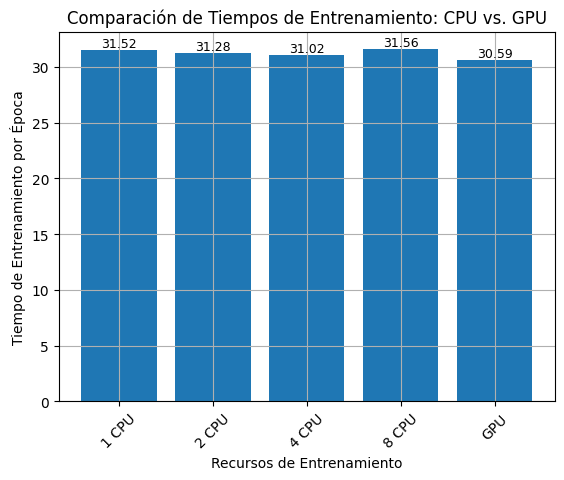

In [75]:
import time
import tensorflow as tf
import matplotlib.pyplot as plt

# Configuración de recursos
num_cpus = [1, 2, 4, 8]
use_gpu = True

# Listas para almacenar los tiempos de entrenamiento
tiempos = []

# Realizar experimentos para CPU
for num_cpu in num_cpus:
    # Configurar TensorFlow para usar el número de núcleos de CPU especificado
    tf.config.threading.set_inter_op_parallelism_threads(num_cpu)

    start_time = time.time()
    history = trainer(train_dataset, val_dataset, model1, args)
    history2 = trainer_l1(train_dataset, val_dataset, model2, args)
    history3 = trainer_entropy(train_dataset, val_dataset, model3, args)
    end_time = time.time()
    tiempo_entrenamiento = end_time - start_time
    tiempos.append(tiempo_entrenamiento)
print("Tiempo de ejecución:", tiempos, "segundos")

# Realizar experimentos para GPU
if use_gpu:
    start_time = time.time()
    history_gpu = trainer(train_dataset, val_dataset, model1, args)
    history_gpu2 = trainer_l1(train_dataset, val_dataset, model2, args)
    history_gpu3 = trainer_entropy(train_dataset, val_dataset, model3, args)
    end_time = time.time()
    tiempo_entrenamiento_gpu = end_time - start_time
    tiempos.append(tiempo_entrenamiento_gpu)

# Crear un gráfico de barras comparativo
fig, ax = plt.subplots()
x_labels = [str(cpu) + ' CPU' for cpu in num_cpus]
x_labels.append('GPU')

bars = ax.bar(range(len(tiempos)), tiempos, align='center', tick_label=x_labels)
ax.set_xlabel('Recursos de Entrenamiento')
ax.set_ylabel('Tiempo de Entrenamiento por Época')
ax.set_title('Comparación de Tiempos de Entrenamiento: CPU vs. GPU')
plt.xticks(rotation=45)
plt.grid(True)

# Agregar los valores de tiempo de ejecución encima de cada barra
for bar, tiempo in zip(bars, tiempos):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, round(tiempo, 2), ha='center', va='bottom', color='black', fontsize=9)

plt.show()



<<<|||------Programacion MultiThreading para el modelo
Se crearon tres hilos uno para cada valor de perdida o metrica y cada hilo ejecuto uno de ellos ------|||>>>

Epoch 1/15
Train Loss: 0.0133 | Val Loss: 0.0184
--------------------
Epoch 1/15
Train Loss: 0.0007 | Val Loss: 0.0002
--------------------
Epoch 1/15
Train Loss: 0.4447 | Val Loss: 0.4175
--------------------
Epoch 2/15Epoch 2/15
Train Loss: 0.0089 | Val Loss: 0.0060
--------------------

Train Loss: 0.0003 | Val Loss: 0.0004
--------------------
Epoch 2/15
Train Loss: 0.4447 | Val Loss: 0.4176
--------------------
Epoch 3/15
Train Loss: 0.0089 | Val Loss: 0.0176
--------------------
Epoch 3/15
Train Loss: 0.0002 | Val Loss: 0.0004
--------------------
Epoch 3/15
Train Loss: 0.4447 | Val Loss: 0.4177
--------------------
Epoch 4/15
Train Loss: 0.0080 | Val Loss: 0.0189
--------------------
Epoch 4/15
Train Loss: 0.0002 | Val Loss: 0.0002
--------------------
Epoch 5/15
Train Loss: 0.0076 | Val Loss: 0.0131
--------------------
Epoch 4/15
Train Loss: 0.4447 | Val Loss: 0.4179
--------------------
Epoch 5/15
Train Loss: 0.0002 | Val Loss: 0.0007
--------------------
Epoch 5/15
Train Los

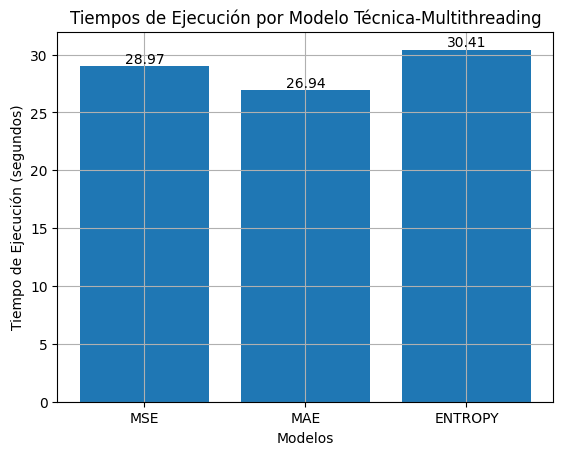

In [76]:
import threading
import time
import matplotlib.pyplot as plt


# Función para entrenar el modelo 1
def train_model_1():
    global history1, duration1
    start_time1 = time.time()  # Guardar el tiempo de inicio
    history1 = trainer(train_dataset, val_dataset, model1, args)
    end_time1 = time.time()  # Guardar el tiempo de finalización
    duration1 = end_time1 - start_time1  # Guardar el tiempo de ejecución

# Función para entrenar el modelo 2
def train_model_2():
    global history2, duration2
    start_time2 = time.time()  # Guardar el tiempo de inicio
    history2 = trainer_l1(train_dataset, val_dataset, model2, args)
    end_time2 = time.time()  # Guardar el tiempo de finalización
    duration2 = end_time2 - start_time2  # Guardar el tiempo de ejecución

# Función para entrenar el modelo 3
def train_model_3():
    global history3, duration3
    start_time3 = time.time()  # Guardar el tiempo de inicio
    history3 = trainer_entropy(train_dataset, val_dataset, model3, args)
    end_time3 = time.time()  # Guardar el tiempo de finalización
    duration3 = end_time3 - start_time3  # Guardar el tiempo de ejecución

start_time = time.time()
# Crear los hilos para ejecutar las funciones de entrenamiento
thread1 = threading.Thread(target=train_model_1)
thread2 = threading.Thread(target=train_model_2)
thread3 = threading.Thread(target=train_model_3)

# Iniciar los hilos
thread1.start()
thread2.start()
thread3.start()

# Esperar a que los hilos terminen
thread1.join()
thread2.join()
thread3.join()

# Obtener el tiempo de finalización
end_time = time.time()

# Calcular la duración en segundos
durationmultithreading = end_time - start_time

print("Tiempo de ejecución:", durationmultithreading, "segundos")

# Obtener los tiempos de ejecución de cada hilo
execution_times = [duration1, duration2, duration3]

# Definir la lista de números de hilos (pueden ser nombres de los modelos o índices)
model_names = ["MSE", "MAE", "ENTROPY"]

# Graficar el rendimiento del número de hilos por tiempo de ejecución
plt.bar(model_names, execution_times)
plt.xlabel('Modelos')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Tiempos de Ejecución por Modelo Técnica-Multithreading')
plt.grid(True)
# Agregar los tiempos de ejecución encima de cada barra
for i, v in enumerate(execution_times):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.show()





<<<|||------Programacion MultiProcessing donde se tienen procesos y se evaluan los modelos en el mismo ------|||>>>

Process Process-1:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Process Process-2:
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-67-8a81231ad789>", line 11, in trainer
    model = model.to(device)
Process Process-3:
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1145, in to
    return self._apply(convert)
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 797, in _apply
    module._apply(fn)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/modul

Número de procesos: 1
Tiempo de ejecución de MSE: 0.39613962173461914
Tiempo de ejecución de MAE: 0.39614129066467285
Tiempo de ejecución de Entropy: 0.39614248275756836


Process Process-4:
Traceback (most recent call last):
Process Process-7:
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "<ipython-input-67-8a81231ad789>", line 11, in trainer
    model = model.to(device)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1145, in to
    return self._apply(convert)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 797, in _apply
    module._apply(fn)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 797, in _apply
    module._apply(fn)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Process Process-5:
Process Process-8:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torc

Número de procesos: 2
Tiempo de ejecución de MSE: 0.681663990020752
Tiempo de ejecución de MAE: 0.6816647052764893
Tiempo de ejecución de Entropy: 0.6816654205322266


Process Process-10:
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
Process Process-13:
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Process Process-16:
  File "<ipython-input-67-8a81231ad789>", line 11, in trainer
    model = model.to(device)
Process Process-11:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1145, in to
    return self._apply(convert)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 797, in _apply
    module._apply(fn)
Traceback (most recent call last):
  File "/usr

Número de procesos: 3
Tiempo de ejecución de MSE: 1.0578837394714355
Tiempo de ejecución de MAE: 1.057884931564331
Tiempo de ejecución de Entropy: 1.0578854084014893


Process Process-19:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Process Process-22:
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Process Process-25:
Traceback (most recent call last):
  File "<ipython-input-67-8a81231ad789>", line 11, in trainer
    model = model.to(device)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "<ipython-input-67-8a81231ad789>", line 11, in trainer
    model = model.to(device)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1145, in to
    return self._apply(convert)

Número de procesos: 4
Tiempo de ejecución de MSE: 1.4529337882995605
Tiempo de ejecución de MAE: 1.4529354572296143
Tiempo de ejecución de Entropy: 1.4529359340667725


Process Process-31:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-67-8a81231ad789>", line 11, in trainer
    model = model.to(device)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1145, in to
    return self._apply(convert)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 797, in _apply
    module._apply(fn)
Process Process-34:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 797, in _apply
    module._apply(fn)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Pro

Número de procesos: 5
Tiempo de ejecución de MSE: 1.796086311340332
Tiempo de ejecución de MAE: 1.7960870265960693
Tiempo de ejecución de Entropy: 1.7960875034332275


Process Process-46:
Traceback (most recent call last):
Process Process-49:
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Process Process-52:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Process Process-55:
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Process Process-61:
Traceback (most recent call last):
Process Process-58:
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-67-8a81231ad789>", line 11, in trainer
    model = model.to(device)
  File "<ipython-input-67-8a81231ad789>", line 11, in trainer
    model = model.to(device)
Traceback (most recent call la

Número de procesos: 6
Tiempo de ejecución de MSE: 2.1646244525909424
Tiempo de ejecución de MAE: 2.1646251678466797
Tiempo de ejecución de Entropy: 2.16462779045105


Process Process-64:
Process Process-67:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 797, in _apply
    module._apply(fn)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Process Process-70:
  File "<ipython-input-67-8a81231ad789>", line 11, in trainer
    model = model.to(device)
  File "<ipython-input-67-8a81231ad789>", line 11, in trainer
    model = model.to(device)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1145, in to
    return self._apply(convert)
  File "/us

Número de procesos: 7
Tiempo de ejecución de MSE: 2.513251304626465
Tiempo de ejecución de MAE: 2.5132522583007812
Tiempo de ejecución de Entropy: 2.5132527351379395


Process Process-85:
Process Process-88:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Process Process-91:
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-67-8a81231ad789>", line 11, in trainer
    model = model.to(device)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1145, in to
    return self._apply(convert)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 797, in _apply
    module._apply(fn)
Traceback (most recent call last):
  File "<ipython-input-67-8a81231ad789>", line 11, in trainer
    model = model.to(device)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self

Número de procesos: 8
Tiempo de ejecución de MSE: 3.9688785076141357
Tiempo de ejecución de MAE: 3.968879461288452
Tiempo de ejecución de Entropy: 3.9688796997070312
Multiprocessing completado
Tiempo de ejecución: 14.03719186782837 segundos


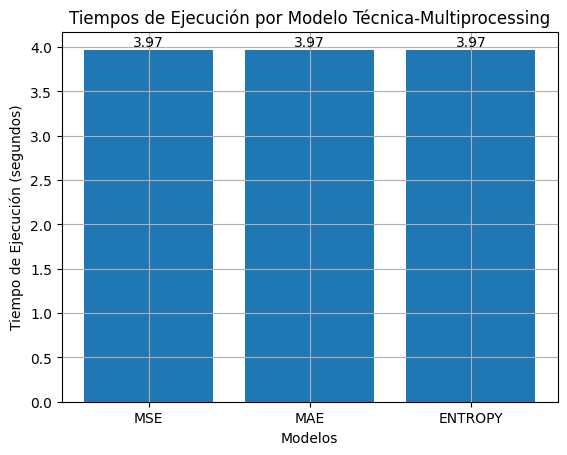

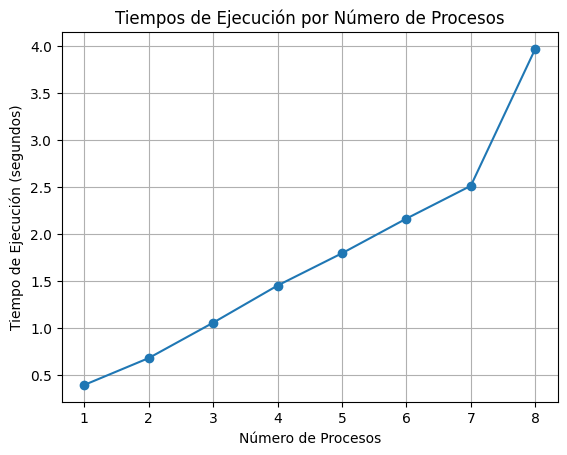

In [77]:
import multiprocessing
import matplotlib.pyplot as plt

start_time = time.time()
# Listas para almacenar los resultados
num_procesos = []
duracion = []

if __name__ == '__main__':
    # Realizar el bucle de procesos
    for num_proc in range(1, 9):  # Prueba con diferentes números de procesos (1 a 8)
        # Crear los procesos para ejecutar las funciones
        procesos = []

        # Crear grupos de procesos para cada modelo
        grupo_procesos1 = []
        grupo_procesos2 = []
        grupo_procesos3 = []

        for _ in range(num_proc):
            modelo1 = multiprocessing.Process(target=trainer, args=(train_dataset, val_dataset, model1, args))
            grupo_procesos1.append(modelo1)

            modelo2 = multiprocessing.Process(target=trainer_l1, args=(train_dataset, val_dataset, model2, args))
            grupo_procesos2.append(modelo2)

            modelo3 = multiprocessing.Process(target=trainer_entropy, args=(train_dataset, val_dataset, model3, args))
            grupo_procesos3.append(modelo3)
        start_time1 = time.time()
        # Iniciar los procesos en cada grupo
        for modelo1 in grupo_procesos1:
            modelo1.start()
        for modelo2 in grupo_procesos2:
            modelo2.start()
        for modelo3 in grupo_procesos3:
            modelo3.start()

        # Esperar a que los procesos terminen en cada grupo
        for modelo1 in grupo_procesos1:
            modelo1.join()
        for modelo2 in grupo_procesos2:
            modelo2.join()
        for modelo3 in grupo_procesos3:
            modelo3.join()

        # Obtener el tiempo de finalización
        end_time1 = time.time()

        # Calcular la duración en segundos
        duration = end_time1 - start_time1

        # Agregar los resultados a las listas
        num_procesos.append(num_proc)
        duracion.append(duration)

        # Imprimir los tiempos de ejecución de cada grupo
        duracion_modelo1=time.time() - start_time1
        duracion_modelo2=time.time() - start_time1
        duracion_modelo3=time.time() - start_time1
        print(f"Número de procesos: {num_proc}")
        print("Tiempo de ejecución de MSE:", duracion_modelo1)
        print("Tiempo de ejecución de MAE:", duracion_modelo2)
        print("Tiempo de ejecución de Entropy:", duracion_modelo3)

    print("Multiprocessing completado")
# Obtener el tiempo de finalización
end_time = time.time()

# Calcular la duración en segundos
durationmultiprocessing = end_time - start_time



print("Tiempo de ejecución:", durationmultiprocessing, "segundos")

# Obtener los tiempos de ejecución de cada hilo
execution_times1 = [duracion_modelo1, duracion_modelo2, duracion_modelo3]

# Definir la lista de números de hilos (pueden ser nombres de los modelos o índices)
model_names1 = ["MSE", "MAE", "ENTROPY"]
# Graficar el rendimiento del número de hilos por tiempo de ejecución
plt.bar(model_names1, execution_times1)
plt.xlabel('Modelos')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Tiempos de Ejecución por Modelo Técnica-Multiprocessing')
plt.grid(True)
# Agregar los tiempos de ejecución encima de cada barra
for i, v in enumerate(execution_times1):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.show()


# Graficar los tiempos de ejecución de los grupos
plt.plot(num_procesos, duracion, marker='o')
plt.xlabel('Número de Procesos')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Tiempos de Ejecución por Número de Procesos')
plt.grid(True)
plt.show()


<<<|||------Programacion Secuencial de cada uno de los modelos a entrenar. En este mostramos el MSE Error cuadratico medio------|||>>>

Epoch 1/15
Train Loss: 0.0005 | Val Loss: 0.0011
--------------------
Epoch 2/15
Train Loss: 0.0003 | Val Loss: 0.0005
--------------------
Epoch 3/15
Train Loss: 0.0002 | Val Loss: 0.0005
--------------------
Epoch 4/15
Train Loss: 0.0002 | Val Loss: 0.0005
--------------------
Epoch 5/15
Train Loss: 0.0002 | Val Loss: 0.0003
--------------------
Epoch 6/15
Train Loss: 0.0002 | Val Loss: 0.0006
--------------------
Epoch 7/15
Train Loss: 0.0002 | Val Loss: 0.0002
--------------------
Epoch 8/15
Train Loss: 0.0002 | Val Loss: 0.0005
--------------------
Epoch 9/15
Train Loss: 0.0001 | Val Loss: 0.0003
--------------------
Epoch 10/15
Train Loss: 0.0001 | Val Loss: 0.0004
--------------------
Epoch 11/15
Train Loss: 0.0001 | Val Loss: 0.0004
--------------------
Epoch 12/15
Train Loss: 0.0001 | Val Loss: 0.0003
--------------------
Epoch 13/15
Train Loss: 0.0001 | Val Loss: 0.0005
--------------------
Epoch 14/15
Train Loss: 0.0001 | Val Loss: 0.0004
--------------------
Epoch 15/15
Tra

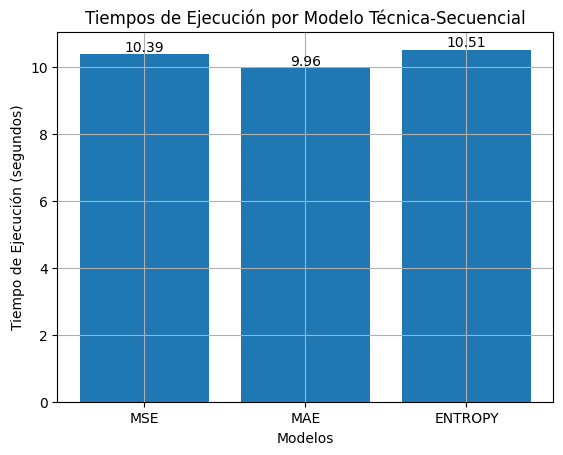

In [78]:
import time

# Obtener el tiempo de inicio
start_time = time.time()

# Entrenar el modelo
start_time1 = time.time()
history = trainer(train_dataset, val_dataset, model1, args)
# Obtener el tiempo de finalización
end_time1 = time.time()
# Calcular la duración en segundos
duration11 = end_time1 - start_time1

start_time2 = time.time()
history2 = trainer_l1(train_dataset, val_dataset, model2, args)
# Obtener el tiempo de finalización
end_time2 = time.time()
# Calcular la duración en segundos
duration22 = end_time2 - start_time2

start_time3 = time.time()
history3 = trainer_entropy(train_dataset, val_dataset, model3, args)
end_time3 = time.time()
# Calcular la duración en segundos
duration33 = end_time3 - start_time3

# Obtener el tiempo de finalización
end_time = time.time()

# Calcular la duración en segundos
durationsecuencial = end_time - start_time
print("Tiempo de ejecución MSE:", duration11, "segundos")
print("Tiempo de ejecución MAE:", duration22, "segundos")
print("Tiempo de ejecución Entropy:", duration33, "segundos")

print("Tiempo de ejecución:", durationsecuencial, "segundos")


# Obtener los tiempos de ejecución de cada hilo
execution_times1 = [duration11, duration22, duration33]

# Definir la lista de números de hilos (pueden ser nombres de los modelos o índices)
model_names = ["MSE", "MAE", "ENTROPY"]

# Graficar el rendimiento del número de hilos por tiempo de ejecución
plt.bar(model_names, execution_times1)
plt.xlabel('Modelos')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Tiempos de Ejecución por Modelo Técnica-Secuencial')
plt.grid(True)
# Agregar los tiempos de ejecución encima de cada barra
for i, v in enumerate(execution_times1):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.show()

Epoch 1/15Epoch 1/15
Train Loss: 3.0237 | Val Loss: 2.6550

--------------------
Train Loss: 0.0004 | Val Loss: 0.0005
--------------------
Epoch 1/15
Train Loss: 0.0004 | Val Loss: 0.0002
--------------------
Epoch 2/15
Train Loss: 0.0003 | Val Loss: 0.0003
--------------------
Epoch 2/15
Train Loss: 0.0003 | Val Loss: 0.0004
--------------------
Epoch 2/15
Train Loss: 2.4331 | Val Loss: 1.9752
--------------------
Epoch 3/15
Train Loss: 0.0002 | Val Loss: 0.0003
--------------------
Epoch 3/15
Train Loss: 0.0002 | Val Loss: 0.0002
--------------------
Epoch 3/15
Train Loss: 1.9157 | Val Loss: 1.5639
--------------------
Epoch 4/15
Train Loss: 0.0002 | Val Loss: 0.0005
--------------------
Epoch 4/15
Train Loss: 0.0001 | Val Loss: 0.0004
--------------------
Epoch 4/15
Train Loss: 1.4734 | Val Loss: 1.2172
--------------------
Epoch 5/15
Train Loss: 0.0002 | Val Loss: 0.0002
--------------------
Epoch 5/15
Train Loss: 0.0001 | Val Loss: 0.0004
--------------------
Epoch 5/15
Train Los

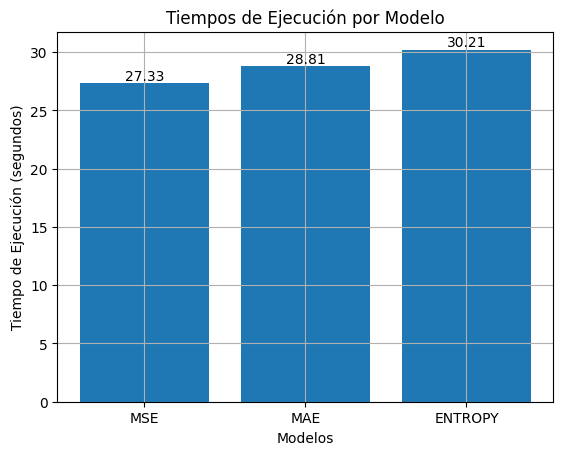

In [79]:
import concurrent.futures

# Definir una función wrapper para realizar el entrenamiento de un modelo
def train_model(train_data, val_data, model, args):
    # Obtener el tiempo de inicio
    start_time = time.time()
    # Realizar el entrenamiento del modelo y obtener el historial
    history = trainer(train_data, val_data, model, args)
    # Obtener el tiempo de finalización
    end_time = time.time()
    # Calcular la duración en segundos
    duration = end_time - start_time
    # Devolver el historial y la duración del modelo
    return history, duration

# Lista de modelos a entrenar (model1, model2, model3, etc.)
models = [model1, model2, model3]

# Crear una lista para almacenar los resultados de las tareas
results = []

# Obtener el tiempo de inicio
start_time = time.time()
# Crear un ThreadPoolExecutor con el número de hilos deseado
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Ejecutar las tareas en paralelo
    futures = [executor.submit(train_model, train_dataset, val_dataset, model, args) for model in models]

    # Obtener los resultados de las tareas a medida que se completan
    for future in concurrent.futures.as_completed(futures):
        result = future.result()
        results.append(result)
# Obtener el tiempo de finalización
end_time = time.time()

# Calcular la duración en segundos del concurrent
durationconcurrent = end_time - start_time
# Asignar los resultados a los historiales correspondientes
history, duration1 = results[0]
history2, duration2 = results[1]
history3, duration3 = results[2]

print("Tiempo de ejecución Concurrent:", durationconcurrent, "segundos")
print("Tiempo de ejecución del MAE:", duration1, "segundos")
print("Tiempo de ejecución del MSE:", duration2, "segundos")
print("Tiempo de ejecución del Entropy:", duration3, "segundos")


# Obtener los tiempos de ejecución de cada hilo
execution_times2 = [duration1, duration2, duration3]

# Definir la lista de números de hilos (pueden ser nombres de los modelos o índices)
model_names1 = ["MSE", "MAE", "ENTROPY"]
# Graficar el rendimiento del número de hilos por tiempo de ejecución
plt.bar(model_names1, execution_times2)
plt.xlabel('Modelos')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Tiempos de Ejecución por Modelo')
plt.grid(True)
# Agregar los tiempos de ejecución encima de cada barra
for i, v in enumerate(execution_times2):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.show()



<<<|||------Comparación de los tiempos de ejecucion de cada uno de las tecnicas aplicadas------|||>>>

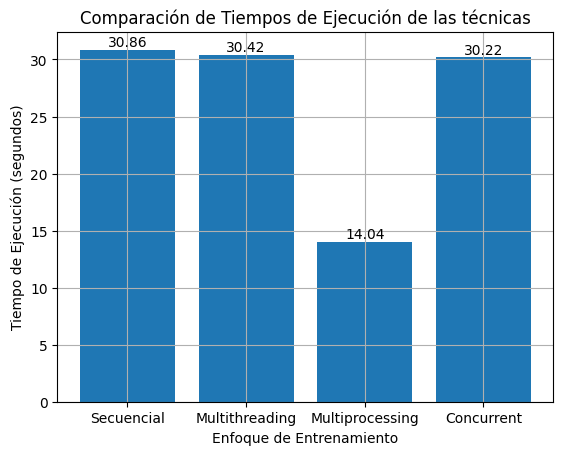

In [80]:
# Preparar los datos para la gráfica de barras
approaches = ['Secuencial', 'Multithreading', 'Multiprocessing', 'Concurrent']
execution_times = [durationsecuencial, durationmultithreading, durationmultiprocessing, durationconcurrent]

# Graficar los tiempos de ejecución
plt.bar(approaches, execution_times)
plt.xlabel('Enfoque de Entrenamiento')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Comparación de Tiempos de Ejecución de las técnicas')
plt.grid(True)

# Agregar los valores de cada barra encima de ellas
for i, v in enumerate(execution_times):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()


<<<|||------Cálculo del SpeedUP de MultiThreading y del MultiPreocessing------|||>>>



In [81]:

#El speedup representa cuánto más rápido se ejecuta el programa al aumentar la cantidad de recursos (hilos o procesos)
# Tiempo de ejecución secuencial
tiempo_secuencial = durationsecuencial

# Tiempo de ejecución con Multithreading
tiempo_multithreading = durationmultithreading

# Tiempo de ejecución con Multiprocessing
tiempo_multiprocessing = durationmultiprocessing

tiempo_concurrent = durationconcurrent

# Calcular el speedup
speedup_multithreading = tiempo_secuencial / tiempo_multithreading
speedup_multiprocessing = tiempo_secuencial / tiempo_multiprocessing
speedup_concurrent = tiempo_secuencial / tiempo_concurrent

print("El speedup representa cuánto más rápido se ejecuta el programa al aumentar la cantidad de recursos (hilos o procesos)")
print("Si el SpeedUP es mayor que 1 es señal de que hay mejora en el rendimiento")
print("Speedup Multithreading:", speedup_multithreading)
print("Speedup Multiprocessing:", speedup_multiprocessing)
print("Speedup Concurrent:", speedup_concurrent)

if speedup_multithreading > speedup_multiprocessing and speedup_multithreading > speedup_concurrent:
    print("El de mejor rendimiento es", speedup_multithreading)

elif  speedup_multiprocessing > speedup_multithreading and speedup_multiprocessing > speedup_concurrent:
    print("El de mejor rendimiento es", speedup_multiprocessing)

else:
  print("El de mejor rendimiento es", speedup_concurrent)


El speedup representa cuánto más rápido se ejecuta el programa al aumentar la cantidad de recursos (hilos o procesos)
Si el SpeedUP es mayor que 1 es señal de que hay mejora en el rendimiento
Speedup Multithreading: 1.014372056143633
Speedup Multiprocessing: 2.1981761406339566
Speedup Concurrent: 1.0211435768760415
El de mejor rendimiento es 2.1981761406339566


<<<|||------Cálculo de la eficiencia de ambas tecnicas de MultiThreading y del MultiPreocessing------|||>>>



In [82]:
# Número de hilos o procesos utilizados
num_hilos = 3  # En el caso de Multithreading
num_procesos = num_proc  # En el caso de Multiprocessing
N=3 #N es el numero de hilos utilizados en el concurrent.futures.ThreadPoolExecutor

# Calcular la eficiencia para Multithreading
eficiencia_multithreading = speedup_multithreading / num_hilos

# Calcular la eficiencia para Multiprocessing
eficiencia_multiprocessing = speedup_multiprocessing / num_procesos

eficiencia_concurrent = speedup_concurrent / N

# Imprimir los resultados
print("Eficiencia Multithreading:", eficiencia_multithreading)
print("Eficiencia Multiprocessing:", eficiencia_multiprocessing)
print("Eficiencia Concurrent:", eficiencia_concurrent)

print("El de mejor eficiencia es el que se acerque más a 1.0:", eficiencia_multiprocessing)


Eficiencia Multithreading: 0.3381240187145443
Eficiencia Multiprocessing: 0.2747720175792446
Eficiencia Concurrent: 0.34038119229201386
El de mejor eficiencia es el que se acerque más a 1.0: 0.2747720175792446


<<<|||------Cálculo de la Escalabilidad a ambas tecnicas de MultiThreading y del MultiPreocessing------|||>>>


In [83]:
import matplotlib.pyplot as plt

# Lista de tamaños de carga
tamanios_carga = [100, 200, 300, 400]  # Haciendo uso de tamaños de carga

# Listas para almacenar los resultados
escalabilidad_multithreading = []
escalabilidad_multiprocessing = []
escalabilidad_concurrent = []

for tamano_carga in tamanios_carga:
    # Ejecutar tu programa secuencialmente y medir el tiempo de ejecución secuencial
    tiempo_secuencial = durationsecuencial # Tiempo de ejecución secuencial para el tamaño de carga actual

    # Tiempo de ejecución con Multithreading
    tiempo_multithreading = durationmultithreading

    # Tiempo de ejecución con Multiprocessing
    tiempo_multiprocessing = durationmultiprocessing

        # Tiempo de ejecución con Multiprocessing
    tiempo_concurrent = durationconcurrent

    # Calcular el Speedup para el tamaño de carga actual
    speedup_multithreading = tiempo_secuencial / tiempo_multithreading
    speedup_multiprocessing = tiempo_secuencial / tiempo_multiprocessing
    speedup_concurrent = tiempo_secuencial / tiempo_concurrent

    # Calcular la escalabilidad para el tamaño de carga actual
    escalabilidad_multithreading.append(speedup_multithreading / tiempo_multithreading)
    escalabilidad_multiprocessing.append(speedup_multiprocessing / tiempo_multiprocessing)
    escalabilidad_concurrent.append(speedup_concurrent / tiempo_concurrent)


print("Es para evaluar cómo mejora el rendimiento de un sistema o algoritmo a medida que se incrementa la cantidad de recursos disponibles:")
# Imprimir los resultados
print("Escalabilidad Multithreading:", escalabilidad_multithreading)
print("Escalabilidad Multiprocessing:", escalabilidad_multiprocessing)
print("Escalabilidad Concurrent:", escalabilidad_concurrent)



Es para evaluar cómo mejora el rendimiento de un sistema o algoritmo a medida que se incrementa la cantidad de recursos disponibles:
Escalabilidad Multithreading: [0.03334662055504823, 0.03334662055504823, 0.03334662055504823, 0.03334662055504823]
Escalabilidad Multiprocessing: [0.15659657297068966, 0.15659657297068966, 0.15659657297068966, 0.15659657297068966]
Escalabilidad Concurrent: [0.03379332258791328, 0.03379332258791328, 0.03379332258791328, 0.03379332258791328]


<<<|||------Cálculo de la Overhead a ambas tecnicas de MultiThreading y del MultiPreocessing------|||>>>

In [84]:

overheadTr = (durationsecuencial-durationmultithreading)/durationsecuencial

overheadPr = (durationsecuencial-durationmultiprocessing)/durationsecuencial

overheadCo = (durationsecuencial-durationconcurrent)/durationsecuencial
# Imprimir los resultados

print("Costo computacional o de recursos que implica la introducción de paralelismo o concurrencia en un programa:")
print("El Overhead del Multithreading:", overheadTr)
print("El Overhead del Multiprocessing:", overheadPr)
print("El Overhead del Concurrent:", overheadCo)


Costo computacional o de recursos que implica la introducción de paralelismo o concurrencia en un programa:
El Overhead del Multithreading: 0.014168426719355334
El Overhead del Multiprocessing: 0.5450774023452012
El Overhead del Concurrent: 0.020705782570483805


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1, 64, 64])) that is different to the input size (torch.Size([8, 1, 64, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Tiempo de ejecución: 3.4574594497680664 segundos
